In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('/content/fifa.csv')

df.head()

#Binary 활용 가능성 있는 데이터 - Yes & No 로 구성되어있는 Real Face 
#Preferred foot 또한 0 1 로 대체 가능
#국가 또한 주요 & 이외로 구분 가능 할것으로 보인다

#이외 데이터들은 불가능 할 것으로 보이나 세분화 되어 있는 포지션을 
#골키퍼 & 수비 & 미필 & 공격으로 나누어야 할 필요성이 보임

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,...,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,...,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,...,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,...,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [ ]:
df.shape

(18207, 89)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

In [ ]:
df.drop(['Unnamed: 0','Photo','Flag','Club Logo'],axis=1,inplace=True)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,18207.0,214298.338606,29965.244204,16.0,200315.5,221759.0,236529.5,246620.0
Age,18207.0,25.122206,4.669943,16.0,21.0,25.0,28.0,45.0
Overall,18207.0,66.238699,6.908930,46.0,62.0,66.0,71.0,94.0
Potential,18207.0,71.307299,6.136496,48.0,67.0,71.0,75.0,95.0
Special,18207.0,1597.809908,272.586016,731.0,1457.0,1635.0,1787.0,2346.0
International Reputation,18159.0,1.113222,0.394031,1.0,1.0,1.0,1.0,5.0
Weak Foot,18159.0,2.947299,0.660456,1.0,3.0,3.0,3.0,5.0
Skill Moves,18159.0,2.361308,0.756164,1.0,2.0,2.0,3.0,5.0
Jersey Number,18147.0,19.546096,15.947765,1.0,8.0,17.0,26.0,99.0
Crossing,18159.0,49.734181,18.364524,5.0,38.0,54.0,64.0,93.0


In [ ]:
[(x, df[x].isnull().sum()) for x in df.columns if df[x].isnull().any()]

[('Club', 241),
 ('Preferred Foot', 48),
 ('International Reputation', 48),
 ('Weak Foot', 48),
 ('Skill Moves', 48),
 ('Work Rate', 48),
 ('Body Type', 48),
 ('Real Face', 48),
 ('Position', 60),
 ('Jersey Number', 60),
 ('Joined', 1553),
 ('Loaned From', 16943),
 ('Contract Valid Until', 289),
 ('Height', 48),
 ('Weight', 48),
 ('LS', 2085),
 ('ST', 2085),
 ('RS', 2085),
 ('LW', 2085),
 ('LF', 2085),
 ('CF', 2085),
 ('RF', 2085),
 ('RW', 2085),
 ('LAM', 2085),
 ('CAM', 2085),
 ('RAM', 2085),
 ('LM', 2085),
 ('LCM', 2085),
 ('CM', 2085),
 ('RCM', 2085),
 ('RM', 2085),
 ('LWB', 2085),
 ('LDM', 2085),
 ('CDM', 2085),
 ('RDM', 2085),
 ('RWB', 2085),
 ('LB', 2085),
 ('LCB', 2085),
 ('CB', 2085),
 ('RCB', 2085),
 ('RB', 2085),
 ('Crossing', 48),
 ('Finishing', 48),
 ('HeadingAccuracy', 48),
 ('ShortPassing', 48),
 ('Volleys', 48),
 ('Dribbling', 48),
 ('Curve', 48),
 ('FKAccuracy', 48),
 ('LongPassing', 48),
 ('BallControl', 48),
 ('Acceleration', 48),
 ('SprintSpeed', 48),
 ('Agility', 48

In [ ]:
#height과 weight의 결측치가 48로 전체 48개의 결측치 48의 원인일 것이다.
missing_height = df[df['Height'].isnull()].index.tolist()
missing_weight = df[df['Weight'].isnull()].index.tolist()
missing_height == missing_weight
df.drop(df.index[missing_height],inplace =True)

In [ ]:
#48개 weight과 height 결측치 지워줬더니 48의 결측치는 없어졌다.
[(x, df[x].isnull().sum()) for x in df.columns if df[x].isnull().any()]

[('Club', 241),
 ('Position', 12),
 ('Jersey Number', 12),
 ('Joined', 1505),
 ('Loaned From', 16895),
 ('Contract Valid Until', 241),
 ('LS', 2037),
 ('ST', 2037),
 ('RS', 2037),
 ('LW', 2037),
 ('LF', 2037),
 ('CF', 2037),
 ('RF', 2037),
 ('RW', 2037),
 ('LAM', 2037),
 ('CAM', 2037),
 ('RAM', 2037),
 ('LM', 2037),
 ('LCM', 2037),
 ('CM', 2037),
 ('RCM', 2037),
 ('RM', 2037),
 ('LWB', 2037),
 ('LDM', 2037),
 ('CDM', 2037),
 ('RDM', 2037),
 ('RWB', 2037),
 ('LB', 2037),
 ('LCB', 2037),
 ('CB', 2037),
 ('RCB', 2037),
 ('RB', 2037),
 ('Release Clause', 1516)]

In [ ]:
#쓸모없는 값 제거
df.drop(['Loaned From','Release Clause','Joined'],axis=1,inplace=True)

In [ ]:
#현재 wage가 m과 k로 되어있다 -> 이것을 재구성 해보자
def value_conversion(df_value):
    try:
        value = float(df_value[1:-1])
        suffix = df_value[-1:]

        if suffix == 'M':
            value = value * 1000000
        elif suffix == 'K':
            value = value * 1000
    except ValueError:
        value = 0
    return value

df['Value'] = df['Value'].apply(value_conversion)
df['Wage'] = df['Wage'].apply(value_conversion)

In [ ]:
#확인해보면 wage와 value가 바뀐것을 알 수 있다. 

df.iloc[:30]

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,...,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,...,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,...,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,...,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,...,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0
5,183277,E. Hazard,27,Belgium,91,91,Chelsea,93000000.0,340000.0,2142,Right,4.0,4.0,4.0,High/ Medium,Normal,Yes,LF,10.0,2020,5'8,163lbs,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,82+3,82+3,82+3,89+3,66+3,63+3,...,66+3,60+3,49+3,49+3,49+3,60+3,81.0,84.0,61.0,89.0,80.0,95.0,83.0,79.0,83.0,94.0,94.0,88.0,95.0,90.0,94.0,82.0,56.0,83.0,66.0,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0
6,177003,L. Modrić,32,Croatia,91,91,Real Madrid,67000000.0,420000.0,2280,Right,4.0,4.0,4.0,High/ High,Lean,Yes,RCM,10.0,2020,5'8,146lbs,77+3,77+3,77+3,85+3,84+3,84+3,84+3,85+3,87+3,87+3,87+3,86+3,88+3,88+3,88+3,86+3,82+3,81+3,...,82+3,79+3,71+3,71+3,71+3,79+3,86.0,72.0,55.0,93.0,76.0,90.0,85.0,78.0,88.0,93.0,80.0,72.0,93.0,90.0,94.0,79.0,68.0,89.0,58.0,82.0,62.0,83.0,79.0,92.0,82.0,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0
7,176580,L. Suárez,31,Uruguay,91,91,FC Barcelona,80000000.0,455000.0,2346,Right,5.0,4.0,3.0,High/ Medium,Normal,Yes,RS,9.0,2021,6'0,190lbs,87+5,87+5,87+5,86+5,87+5,87+5,87+5,86+5,85+5,85+5,85+5,84+5,79+5,79+5,79+5,84+5,69+5,68+5,...,69+5,66+5,63+5,63+5,63+5,66+5,77.0,93.0,77.0,82.0,88.0,87.0,86.0,84.0,64.0,90.0,86.0,75.0,82.0

In [ ]:
#데이터의 이해를 위해 분석을 해보자

#유럽이 가장 많은 proportion을 가지고 있으며 England가 1등
print('Total number of countries : {0}'.format(df['Nationality'].nunique()))
print(df['Nationality'].value_counts())

Total number of countries : 164
England                1657
Germany                1195
Spain                  1071
Argentina               936
France                  911
                       ... 
St Lucia                  1
São Tomé & Príncipe       1
Palestine                 1
New Caledonia             1
Andorra                   1
Name: Nationality, Length: 164, dtype: int64


In [ ]:
#전체 구단수와 이에 따른 각 팀의 선수 수를 찾아보자
#33부터 - 18까지 다양한 모습을 볼 수 있다.
print('Total number of clubs : {0}'.format(df['Club'].nunique()))
print(df['Club'].value_counts())

Total number of clubs : 651
Liverpool             33
Fortuna Düsseldorf    33
Real Madrid           33
Chelsea               33
RC Celta              33
                      ..
Fluminense            20
Atlético Mineiro      20
Limerick FC           19
Sligo Rovers          19
Derry City            18
Name: Club, Length: 651, dtype: int64


In [ ]:
#FIFA라는 축구 게임 특성상 Potential과 Overall이라는 두가지 능력치가 있다
#Potential - 잠재력 & Overall - 현재 능력

#Kylina Mbappe가 가장 뛰어난 유망주
#Lionel Messi가 현재 기준 가장 뛰어난 선수
print('Maximum Potential : '+str(df.loc[df['Potential'].idxmax()][1]))
print('Maximum Overall Perforamnce : '+str(df.loc[df['Overall'].idxmax()][1]))

Maximum Potential : K. Mbappé
Maximum Overall Perforamnce : L. Messi


In [ ]:
#선수 능력치를 결정하는 Attribute 이다

Attributes =['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']

In [ ]:
#각 능력치마다 가장 뛰어난 선수를 측정해보자

print('BEST Player per Attributes :')
i=0
while i < len(Attributes):
    print('Best {0} : {1}'.format(Attributes[i],df.loc[df[Attributes[i]].idxmax()][1]))
    i += 1

BEST Player per Attributes :
Best Crossing : K. De Bruyne
Best Finishing : L. Messi
Best HeadingAccuracy : Naldo
Best ShortPassing : L. Modrić
Best Volleys : E. Cavani
Best Dribbling : L. Messi
Best Curve : Quaresma
Best FKAccuracy : L. Messi
Best LongPassing : T. Kroos
Best BallControl : L. Messi
Best Acceleration : Douglas Costa
Best SprintSpeed : K. Mbappé
Best Agility : Neymar Jr
Best Reactions : Cristiano Ronaldo
Best Balance : Bernard
Best ShotPower : Cristiano Ronaldo
Best Jumping : Cristiano Ronaldo
Best Stamina : N. Kanté
Best Strength : A. Akinfenwa
Best LongShots : L. Messi
Best Aggression : B. Pearson
Best Interceptions : N. Kanté
Best Positioning : Cristiano Ronaldo
Best Vision : L. Messi
Best Penalties : M. Balotelli
Best Composure : L. Messi
Best Marking : A. Barzagli
Best StandingTackle : G. Chiellini
Best SlidingTackle : Sergio Ramos
Best GKDiving : De Gea
Best GKHandling : J. Oblak
Best GKKicking : M. Neuer
Best GKPositioning : G. Buffon
Best GKReflexes : De Gea


In [ ]:
#최고 가치 선수: Neymar

df.loc[df['Value'].idxmax()]

ID                  190871
Name             Neymar Jr
Age                     26
Nationality         Brazil
Overall                 92
                   ...    
GKDiving                 9
GKHandling               9
GKKicking               15
GKPositioning           15
GKReflexes              11
Name: 2, Length: 82, dtype: object

In [ ]:
#최고 주급 선수: Neymar
df.loc[df['Wage'].idxmax()]

ID                  158023
Name              L. Messi
Age                     31
Nationality      Argentina
Overall                 94
                   ...    
GKDiving                 6
GKHandling              11
GKKicking               15
GKPositioning           14
GKReflexes               8
Name: 0, Length: 82, dtype: object

In [ ]:
#https://chancoding.tistory.com/12
#https://dining-developer.tistory.com/30

#SNS 다양한 plot 사용 예시 사이트 
#여기서 업그레이드 시킬 방법 생각해보자

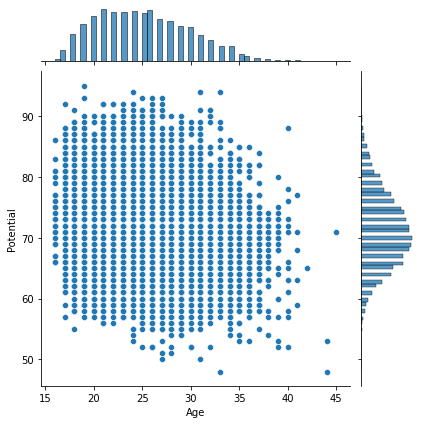

In [ ]:
sns.jointplot(x=df['Age'],y=df['Potential'])


#그래프 확인시에 대체로 23에서 30사이에 전성기가 많이 분포되어 있으며 
#게임기준으로 potential이 높게 나오는 이유이다
#포텐셜은 잠재능력이므로 나이가 들수록 내려간다

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


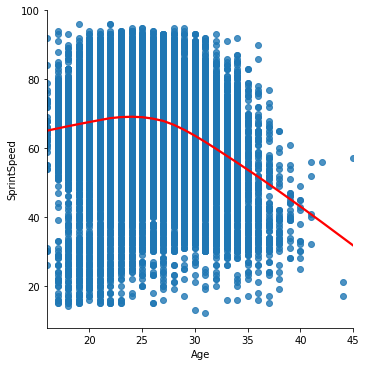

In [ ]:
#나이에 따라 Sprint Speed 감소 추세를 볼 수 있다.

sns.lmplot(x = 'Age', y = 'SprintSpeed', data = df, lowess=True, line_kws={'color':'red'})

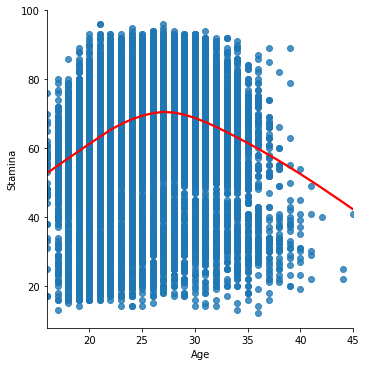

In [ ]:
sns.lmplot(x = 'Age', y = 'Stamina', data = df, lowess=True, line_kws={'color':'red'})

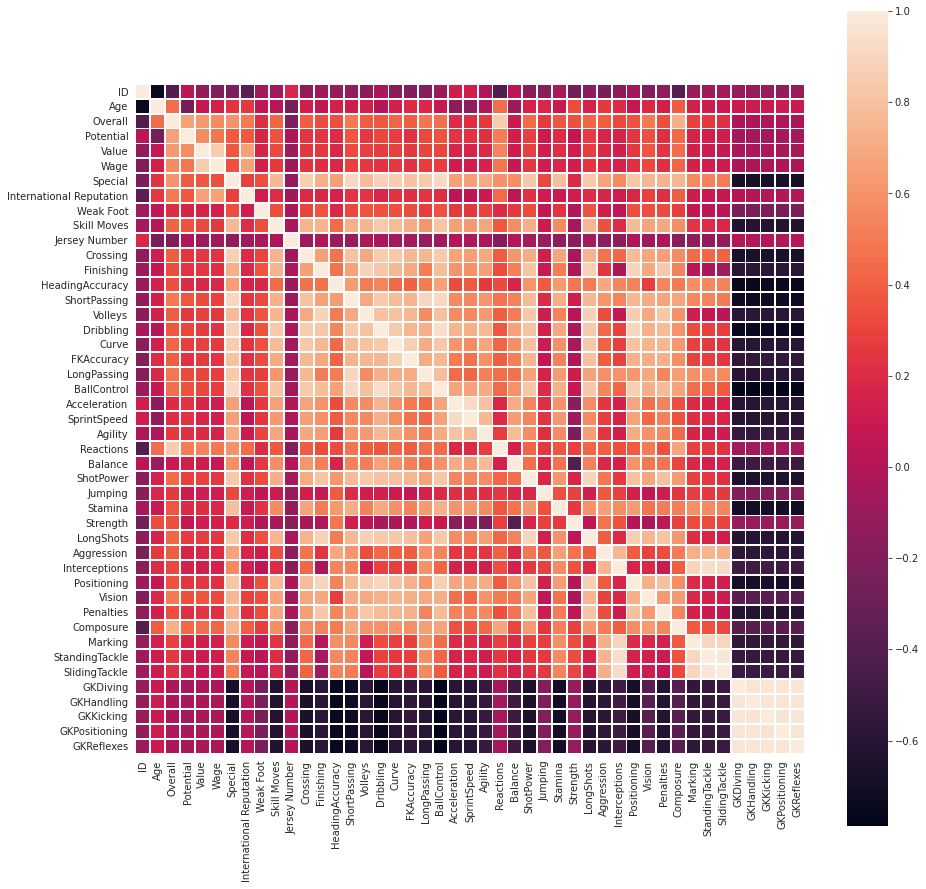

In [ ]:
#Attribute 중에는 패스 & 드리블 같은것이 연관성이 높고
#골키퍼 위주의 능력치가 연관성이 낮다

corr = df.corr()
mask = np.zeros_like(corr)
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 15))
    ax = sns.heatmap(corr,mask=mask,square=True,linewidths=.8)

In [ ]:
#육체 능력 관련 pairplot
#순수 age와 육체능력의 관계를 파악해보자
body = ['Age', 'Overall', 'Potential', 'Acceleration', 'SprintSpeed', 'Agility', 'Stamina', 'Strength', 'Preferred Foot']
df_body = df[body]
df_body.head()

,Age,Overall,Potential,Acceleration,SprintSpeed,Agility,Stamina,Strength,Preferred Foot
0,31,94,94,91.0,86.0,91.0,72.0,59.0,Left
1,33,94,94,89.0,91.0,87.0,88.0,79.0,Right
2,26,92,93,94.0,90.0,96.0,81.0,49.0,Right
3,27,91,93,57.0,58.0,60.0,43.0,64.0,Right
4,27,91,92,78.0,76.0,79.0,90.0,75.0,Right


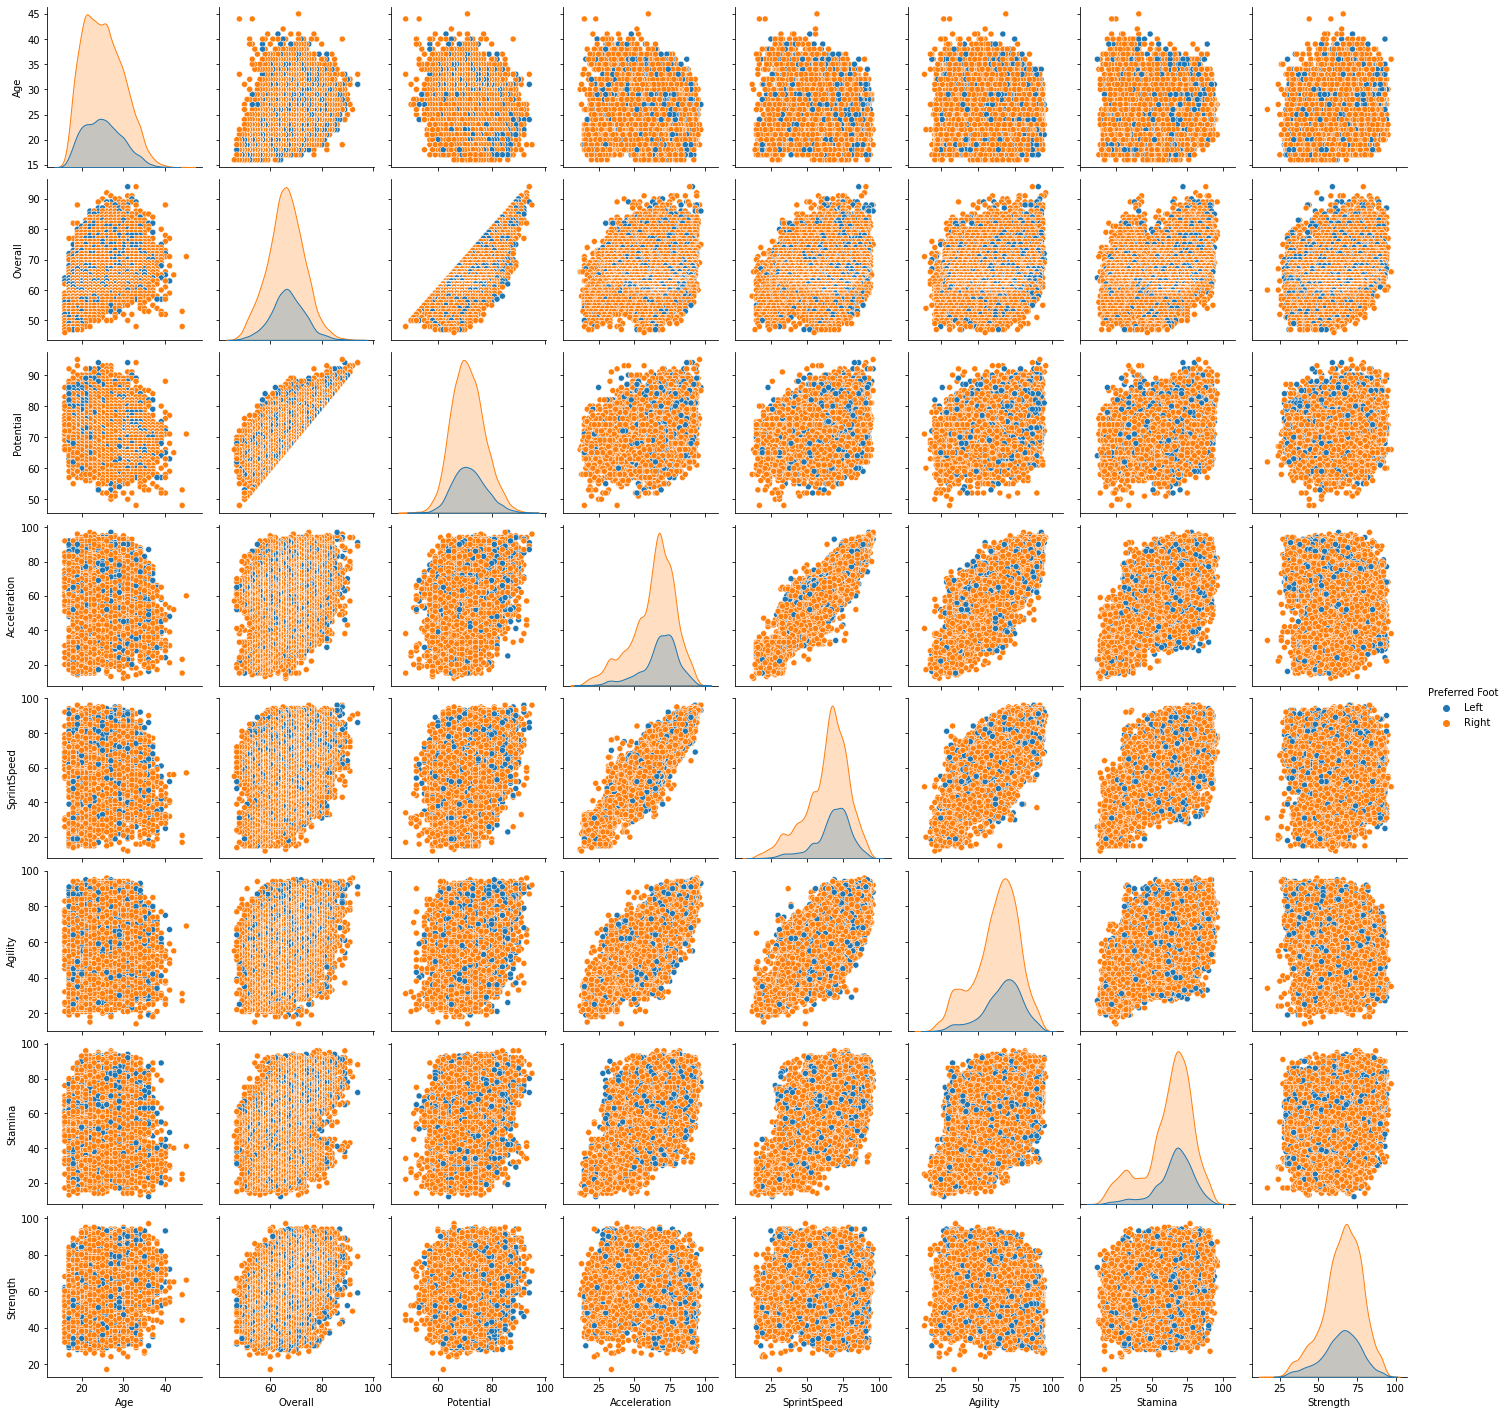

In [ ]:
#주로 쓰는 발 선호도로 구분
sns.pairplot(df_body, hue = 'Preferred Foot')

In [ ]:
#데이터에 대한 이해 끝 -> 이제 분석 및 모델을 설정해보자
#Simple Regression
df=pd.read_csv('/content/fifa.csv')
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,...,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,...,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,...,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,...,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [ ]:
#포지션 데이터는 수정이 필요하다
df.iloc[:,28:54]

,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
0,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2
1,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,42+2,42+2,42+2,44+2,44+2,44+2,44+2,44+2,45+2,45+2,45+2,44+2,45+2,45+2,45+2,44+2,44+2,45+2,45+2,45+2,44+2,45+2,45+2,45+2,45+2,45+2
18203,45+2,45+2,45+2,39+2,42+2,42+2,42+2,39+2,40+2,40+2,40+2,38+2,35+2,35+2,35+2,38+2,30+2,31+2,31+2,31+2,30+2,29+2,32+2,32+2,32+2,29+2
18204,45+2,45+2,45+2,45+2,46+2,46+2,46+2,45+2,44+2,44+2,44+2,44+2,38+2,38+2,38+2,44+2,34+2,30+2,30+2,30+2,34+2,33+2,28+2,28+2,28+2,33+2
18205,47+2,47+2,47+2,47+2,46+2,46+2,46+2,47+2,45+2,45+2,45+2,46+2,39+2,39+2,39+2,46+2,36+2,32+2,32+2,32+2,36+2,35+2,31+2,31+2,31+2,35+2


In [ ]:
#EDA 과정
drop_cols = df.columns[28:54]
df = df.drop(drop_cols, axis = 1)
df = df.drop(['Unnamed: 0','Real Face','ID','Photo','Flag','Club Logo','Jersey Number','Joined','Special','Loaned From','Body Type', 'Release Clause',
               'Weight','Height','Contract Valid Until','Wage','Value','Name','Club'], axis = 1)
df = df.dropna()
df.head()

,Age,Nationality,Overall,Potential,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,31,Argentina,94,94,Left,5.0,4.0,4.0,Medium/ Medium,RF,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,33,Portugal,94,94,Right,5.0,4.0,5.0,High/ Low,ST,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,26,Brazil,92,93,Right,5.0,5.0,5.0,High/ Medium,LW,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,27,Spain,91,93,Right,4.0,3.0,1.0,Medium/ Medium,GK,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,27,Belgium,91,92,Right,4.0,5.0,4.0,High/ High,RCM,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [ ]:
#적용전 항상 copy하는 버릇을 들이자
data = df.copy()

In [ ]:
#위에서 언급한 Face & Foot & Position 변환 
#EDA

def foot(df):
    if (df['Preferred Foot'] == 'Right'):
        return 1
    else:
        return 0
#GK
#DF: RB, LB, CB, LCB, RCB, RWB, LWB
#MF: LDM, CDM, RDM, LM, LCM, CM, RCM, RM
#AM: LAM, CAM, RAM, LW, RW
#STL: RS, ST, LS, CF, LF, RF
def position(df):
    if (df['Position'] == 'GK'):
        return 'GK'
    elif ((df['Position'] == 'RB') | (df['Position'] == 'LB') | (df['Position'] == 'CB') | (df['Position'] == 'LCB') | (df['Position'] == 'RCB') | (df['Position'] == 'RWB') | (df['Position'] == 'LWB') ):
        return 'DF'
    elif ((df['Position'] == 'LDM') | (df['Position'] == 'CDM') | (df['Position'] == 'RDM')):
        return 'DM'
    elif ((df['Position'] == 'LM') | (df['Position'] == 'LCM') | (df['Position'] == 'CM') | (df['Position'] == 'RCM') | (df['Position'] == 'RM')):
        return 'MF'
    elif ((df['Position'] == 'LAM') | (df['Position'] == 'CAM') | (df['Position'] == 'RAM') | (df['Position'] == 'LW') | (df['Position'] == 'RW')):
        return 'AM'
    elif ((df['Position'] == 'RS') | (df['Position'] == 'ST') | (df['Position'] == 'LS') | (df['Position'] == 'CF') | (df['Position'] == 'LF') | (df['Position'] == 'RF')):
        return 'ST'
    else:
        return df.Position


data['Foot'] = data.apply(foot, axis=1)
data['Revised_Position'] = data.apply(position,axis = 1)

In [ ]:
#국가 변환
print(df['Nationality'].nunique()) #164개 종류
df['Nationality'].value_counts()
#0과 1로 나누려 하는데 기준을 200으로 해보자

nation_value = df.Nationality.value_counts()
nation = nation_value[nation_value > 300].index.tolist()

def major(df):
    if (df.Nationality in nation):
        return 1
    else:
        return 0

data['Nation'] = data.apply(major,axis = 1)  

164


In [ ]:
#Work Rate 구분

work = data['Work Rate'].str.split('/', n =1, expand = True)
data['WorkRate_A'] = work[0]
data['WorkRate_B'] = work[1]

In [ ]:
#EDA 해준 feature들 다 drop

data = data.drop(['Work Rate','Preferred Foot', 'Position','Nationality'], axis = 1)

In [ ]:
data.head()

,Age,Overall,Potential,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Foot,Revised_Position,Nation,WorkRate_A,WorkRate_B
0,31,94,94,5.0,4.0,4.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,0,ST,1,Medium,Medium
1,33,94,94,5.0,4.0,5.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,1,ST,1,High,Low
2,26,92,93,5.0,5.0,5.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,1,AM,1,High,Medium
3,27,91,93,4.0,3.0,1.0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,1,GK,1,Medium,Medium
4,27,91,92,4.0,5.0,4.0,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,1,MF,0,High,High


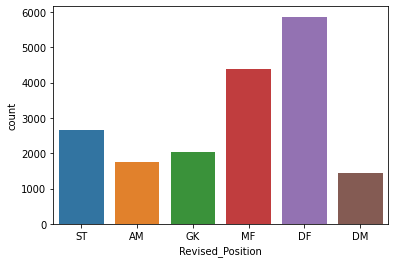

In [ ]:
fig = sns.countplot( x = 'Revised_Position', data = data)

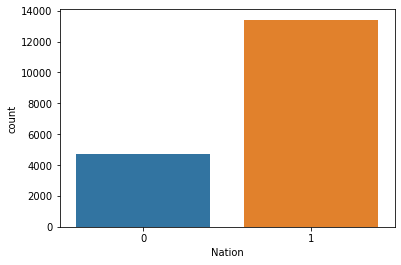

In [ ]:
fig = sns.countplot( x = 'Nation', data = data)

In [ ]:
#모델 적용
from sklearn.model_selection import train_test_split
target = data.Overall
feature = data.drop(['Overall'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size = 0.2)

#Regression 원핫인코딩 Session 213 참고
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

print(X_test.shape,X_train.shape)
print(y_test.shape,y_train.shape)

(3630, 53) (14517, 53)
(3630,) (14517,)


In [ ]:
#Linear Regression 적용
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
    
print(f'Test MAE: {mae:,.0f}')
print(f'Test R2: {r2:,.3f}')
print(f'Test RMSE: {np.sqrt(mae)}')

Test MAE: 1
Test R2: 0.931
Test RMSE: 1.2012039975696587
